### Machine Learning
* Supervised Learning
* Unsupervised Learning
* Reinforcement Learning

#### Supervised
* input, output
    #### Regression / Classification
    * Regression >>>>> for continuous target feature
    
    * Classification >>>> Classes 


#### Unsupervised
* No output/ label >>>>> Clustering

#### Reinforcement
* Learn through penalty and reward

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# df = pd.DataFrame({'Feature_1':F1_, 'Feature_2':F2_, 'Feature_3':F3_, 'Target':T2_})

### Importing the data

In [11]:
df = pd.read_csv('dataset.csv')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature_1  300 non-null    float64
 1   Feature_2  300 non-null    float64
 2   Feature_3  300 non-null    float64
 3   Target     300 non-null    float64
dtypes: float64(4)
memory usage: 9.5 KB


In [13]:
df.isnull().sum()

Feature_1    0
Feature_2    0
Feature_3    0
Target       0
dtype: int64

In [14]:
df['Feature_1']   ##### Series

0      0.519922
1      0.166809
2      0.471747
3      0.070557
4      0.221034
         ...   
295    0.998954
296    0.389154
297    0.924007
298    0.689523
299    0.461582
Name: Feature_1, Length: 300, dtype: float64

In [15]:
df[['Feature_1', 'Feature_2']] ### Dataframe

,Feature_1,Feature_2
0,0.519922,0.172053
1,0.166809,0.116245
2,0.471747,0.544830
3,0.070557,0.576866
4,0.221034,0.389579
...,...,...
295,0.998954,0.758291
296,0.389154,0.641584
297,0.924007,0.057771
298,0.689523,0.191863


In [16]:
df.shape

(300, 4)

### Splitting into train and test

In [17]:
300*0.7

210.0

In [18]:
df_new = df.sample(frac=1)

In [19]:
train = df_new[:210].reset_index(drop=True)

In [20]:
test = df_new[210:].reset_index(drop=True)

In [21]:
train

,Feature_1,Feature_2,Feature_3,Target
0,0.919013,0.071644,0.424967,7.673763
1,0.924371,0.063181,0.340557,7.095861
2,0.478081,0.790623,0.814692,9.281022
3,0.256620,0.059415,0.270279,5.282147
4,0.246936,0.437111,0.778052,7.402983
...,...,...,...,...
205,0.446260,0.179218,0.099015,5.969476
206,0.603691,0.013641,0.043147,5.277534
207,0.221459,0.335541,0.390658,5.894033
208,0.947688,0.254061,0.849956,9.522668


In [22]:
test

,Feature_1,Feature_2,Feature_3,Target
0,0.771343,0.247010,0.937971,9.006048
1,0.796656,0.196416,0.100099,6.447078
2,0.234722,0.484952,0.416946,7.388591
3,0.588231,0.486798,0.858665,9.015236
4,0.747789,0.654350,0.573195,9.370726
...,...,...,...,...
85,0.553228,0.610598,0.618291,8.515656
86,0.238087,0.586715,0.687689,8.269854
87,0.062924,0.573934,0.678264,7.001140
88,0.143218,0.959599,0.291228,7.375515


In [23]:
df_new.columns

Index(['Feature_1', 'Feature_2', 'Feature_3', 'Target'], dtype='object')

### Seperate Feature and Target

In [24]:
x_train = train[['Feature_1', 'Feature_2', 'Feature_3']]
y_train = train['Target']

In [25]:
x_test = test[['Feature_1', 'Feature_2', 'Feature_3']]
y_test = test['Target']

### Model Training

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
model = LinearRegression()

In [28]:
model.fit(x_train, y_train)

LinearRegression()

### Model Test

In [29]:
prediction = model.predict(x_test)
prediction

array([ 9.33225704,  6.76950566,  6.86621398,  9.27481114,  9.44179563,
        8.33391851,  7.14592461,  8.25035717,  6.45169133, 10.1378179 ,
        7.09657339,  8.16075491,  6.79339178,  7.4307558 ,  6.93888105,
        4.532985  ,  5.64914681,  8.32403065,  9.03928356,  6.69211281,
        8.26152048,  6.21136587,  5.24255502,  5.44867462,  6.0965226 ,
        8.82036811,  6.15727519,  9.39489491,  6.7578049 ,  8.83992927,
        5.75959678,  7.5183118 ,  5.61935058,  9.14634667,  7.19505342,
        7.07077361,  6.75943531,  9.63214631,  6.64221082,  5.96245043,
       10.21550499,  9.63033594,  5.8641185 ,  6.48790214,  7.94429936,
       10.41364513,  9.75642145,  5.70183293, 12.25156822,  8.93071816,
        5.27190267,  7.53324149, 11.30830053,  5.83723634,  8.86467441,
        9.44426179,  7.56329809,  7.14872009,  8.74610994,  9.54733591,
        7.41585955,  7.52036674, 10.79857563,  7.69790756,  6.35655567,
        7.08890318,  7.1319504 ,  8.25750449,  7.5098503 ,  8.23

In [30]:
pd.DataFrame({'Prediction':prediction, 'Actual':y_test})

,Prediction,Actual
0,9.332257,9.006048
1,6.769506,6.447078
2,6.866214,7.388591
3,9.274811,9.015236
4,9.441796,9.370726
...,...,...
85,8.838029,8.515656
86,7.995035,8.269854
87,7.385713,7.001140
88,7.683176,7.375515


In [31]:
from sklearn.metrics import mean_squared_error

In [32]:
mean_squared_error(prediction, y_test)*100

7.875117862097186

Text(0, 0.5, 'Target')

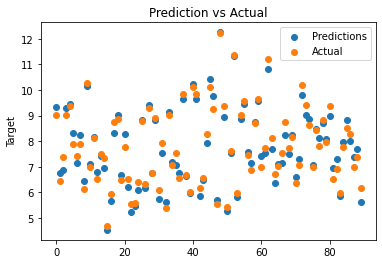

In [33]:
plt.scatter(range(0,90), prediction, label='Predictions')
plt.scatter(range(0,90), y_test, label='Actual')
plt.legend()
plt.title('Prediction vs Actual')
plt.ylabel('Target')

In [34]:
prediction.sort()


In [36]:
(list(y_test)).sort()

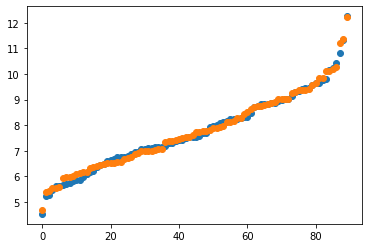

In [47]:
plt.scatter(range(0,90), prediction)
plt.scatter(range(0,90), yy)

In [45]:
yy = y_test.sort_values()